# i - Import Libraries
> *Cell* pertama pada *notebook* **harus berisi dan hanya** berisi semua *library* yang digunakan dalam project.

In [1]:
# Import Libraries

# Buat memproses data
import pandas as pd
import numpy as np


# Buat memproses grafik
import seaborn as sns
import matplotlib.pyplot as plt

# Buat Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, SMOTENC

# Buat definisi model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Buat evaluasi model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Buat cross validation
from sklearn.model_selection import cross_val_score

# Buat import hasil model saving
import joblib

# ii - Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
df = pd.read_csv ("https://raw.githubusercontent.com/burjoawl/Burrs_Portofolio/main/Projects/Jakarta%20Flood/jakarta_flood.csv")
df

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6304,2018-12-28,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0,3.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6305,2018-12-29,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6306,2018-12-30,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0


## Penjelasan tiap kolom

| Feature | 	Description |
| :---: | --- |
| `Tn`	| min temperature (°C) |
| `Tx`	| max temperature (°C) |
| `Tavg`	| avg temperature (°C) |
| `RH_avg`	| avg humidity(%) |
| `RR`	| rainfall (mm) |
| `ss`	| duration of sunshine(hour) |
| `ff_x`	| max wind speed (m/s) |
| `ddd_x`	| wind direction at maximum speed (°) |
| `ff_avg`	| max wind speed (m/s) |
| `ddd_car`	| most wind direction (°) |
| `station_id`	| station id which record the data |
| `station_name`	| station name which record the data |
| `region_name`	| location of the station |
| `flood`	| 1 means True and 0 means false |

## Menampilkan 10 data pertama

In [3]:
df.head(10)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
5,2016-01-06,25.0,33.6,28.9,80.0,3.8,3.6,4.0,190.0,2.0,E,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
6,2016-01-07,25.2,35.6,30.0,78.0,NaN,7.6,4.0,60.0,2.0,E,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
7,2016-01-08,26.8,NaN,29.9,79.0,NaN,7.9,4.0,50.0,2.0,SE,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
8,2016-01-09,26.8,34.8,29.7,79.0,NaN,10.2,4.0,110.0,2.0,E,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
9,2016-01-10,25.4,34.6,29.2,80.0,NaN,8.2,3.0,80.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0


## Menampilkan 10 data terakhir

In [4]:
df.tail(10)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood
6298,2018-12-22,24.4,30.8,28.3,73.0,1.3,NaN,14.0,210.0,4.0,S,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6299,2018-12-23,24.0,30.0,26.8,76.0,0.2,NaN,11.0,240.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6300,2018-12-24,24.0,33.4,27.8,68.0,NaN,NaN,8.0,90.0,6.0,NE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6301,2018-12-25,24.4,38.0,26.8,76.0,1.7,NaN,11.0,240.0,6.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6302,2018-12-26,24.0,29.4,26.1,80.0,0.4,NaN,9.0,210.0,4.0,S,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6303,2018-12-27,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6304,2018-12-28,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0,3.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6305,2018-12-29,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6306,2018-12-30,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6307,2018-12-31,25.4,32.8,28.2,69.0,9.9,NaN,14.0,180.0,5.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0


## Melihat data statistik

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tn,5996.0,25.397598,3.226555,2.4,24.4,25.0,26.0,246.0
Tx,6095.0,32.577129,5.571823,21.3,31.8,32.6,33.4,334.0
Tavg,6262.0,28.338135,1.798969,23.7,27.7,28.4,29.1,141.6
RH_avg,6256.0,76.903932,9.719251,34.0,72.0,77.0,82.0,488.0
RR,3993.0,9.415502,18.460319,0.0,0.0,1.4,10.5,277.5
ss,5049.0,5.008160,2.788718,0.0,2.8,5.4,7.1,11.6
ff_x,6286.0,4.991887,5.856961,0.0,4.0,4.0,5.0,185.0
ddd_x,6286.0,193.518772,109.211671,0.0,80.0,230.0,280.0,360.0
ff_avg,6215.0,2.338214,1.857624,0.0,1.0,2.0,3.0,82.0
station_id,6308.0,96741.052949,5.239928,96733.0,96733.0,96741.0,96745.0,96747.0


## Melihat tipe data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          6308 non-null   object 
 1   Tn            5996 non-null   float64
 2   Tx            6095 non-null   float64
 3   Tavg          6262 non-null   float64
 4   RH_avg        6256 non-null   float64
 5   RR            3993 non-null   float64
 6   ss            5049 non-null   float64
 7   ff_x          6286 non-null   float64
 8   ddd_x         6286 non-null   float64
 9   ff_avg        6215 non-null   float64
 10  ddd_car       6207 non-null   object 
 11  station_id    6308 non-null   int64  
 12  station_name  6308 non-null   object 
 13  region_name   6308 non-null   object 
 14  flood         6308 non-null   int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 739.3+ KB


## Merubah nama

In [7]:
df.rename(columns={'Tn': 'suhu_min',
                    'Tx': 'suhu_max',
                    'Tavg': 'suhu_rata', 
                    'RH_avg': 'kelembaban_rata',
                    'RR': 'curah_hujan_rata',
                    'ss': 'durasi_cerah',
                    'ff_x': 'kecepatan_angin_max',
                    'ddd_x': 'arah_angin_max',
                    'ff_avg': 'kecepatan_angin_rata',
                    'ddd_car': 'arah_angin', 
                    'region_name' : 'nama_daerah',
                    'flood': 'banjir'
                    }, inplace=True)
df

,date,suhu_min,suhu_max,suhu_rata,kelembaban_rata,curah_hujan_rata,durasi_cerah,kecepatan_angin_max,arah_angin_max,kecepatan_angin_rata,arah_angin,station_id,station_name,nama_daerah,banjir
0,2016-01-01,26.0,34.8,28.6,81.0,NaN,5.8,5.0,280.0,2.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
1,2016-01-02,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,W,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
2,2016-01-03,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,SW,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1
3,2016-01-04,24.8,33.6,29.2,81.0,NaN,6.6,3.0,200.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
4,2016-01-05,25.8,33.6,26.7,91.0,NaN,3.2,3.0,180.0,1.0,S,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,2018-12-27,23.8,32.0,28.0,70.0,NaN,NaN,12.0,180.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6304,2018-12-28,24.0,33.4,28.5,69.0,NaN,NaN,14.0,250.0,3.0,SE,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6305,2018-12-29,25.2,33.4,28.7,70.0,NaN,NaN,14.0,120.0,5.0,SW,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0
6306,2018-12-30,24.0,34.4,30.0,64.0,NaN,NaN,14.0,240.0,5.0,W,96747,Halim Perdana Kusuma Jakarta,Jakarta Timur,0


# iii - Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Visualisasi korelasi antar kolom

<Axes: >

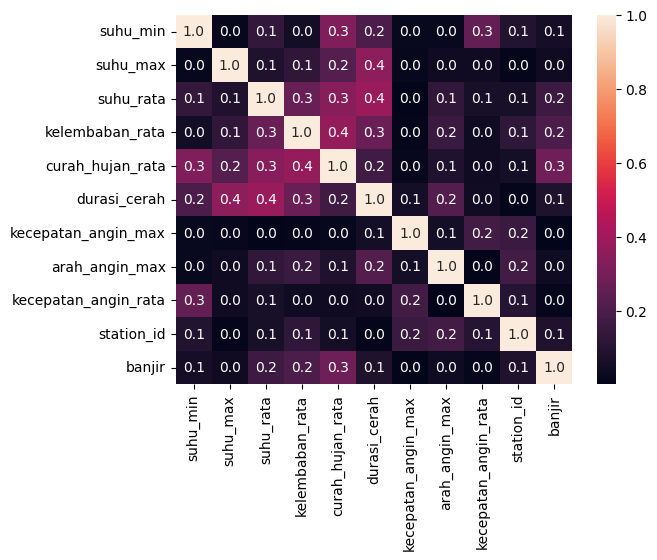

In [8]:
sns.heatmap(df.select_dtypes(include=np.number).corr().abs(), annot=True, fmt=".1f")

## Perbandingan data banjir

Text(0.5, 1.0, 'Perbandingan antara banjir dengan tidak banjir')

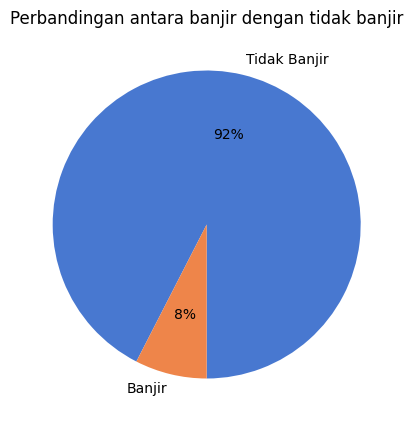

In [9]:
palette_color = sns.color_palette('muted')
plt.figure(figsize = (16, 5))

counts = df['banjir'].value_counts()

plt.pie(counts, colors=palette_color, autopct='%.0f%%', startangle=270, labels=['Tidak Banjir', 'Banjir'])
plt.title ('Perbandingan antara banjir dengan tidak banjir')

> Pada dataset ini, lebih banyak data tidak banjir dibandingkan dengan yang banjir

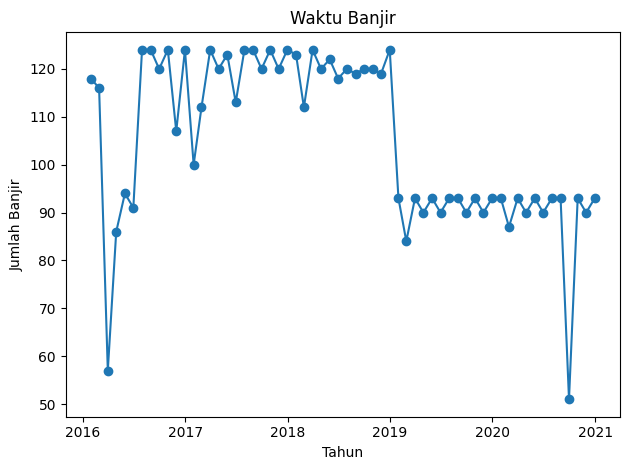

In [10]:
df['date'] = pd.to_datetime(df['date'])

date_month = df.resample('M', on='date').size()

plt.plot(date_month.index, date_month.values, marker='o', linestyle='-')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Banjir')
plt.title ("Waktu Banjir")
plt.tight_layout() 

> EDA akan dilakukan lagi setelah datanya sudah bagus, tidak adanya outlier dan missing value

# iv - Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Membuang kolom yang tidak relevan

In [11]:
df.drop (['date', 'station_name', 'station_id', 'arah_angin'], axis=1, inplace=True)

## Split X (Features) dan y (Target)

In [12]:
X = df.drop(['banjir'], axis=1)
y = df['banjir']

print (X.shape)
print (y.shape)

(6308, 10)
(6308,)


## Split Train-Set dan Test-Set

In [13]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 1509)

print ('X Train Size', X_train.shape)
print ('X Test Size:', X_test.shape)
print ()
print ('y Train Size', y_train.shape)
print ('y Test Size:', y_test.shape)

X Train Size (5046, 10)
X Test Size: (1262, 10)

y Train Size (5046,)
y Test Size: (1262,)


## Handle Missing Value

In [14]:
kolom = ['suhu_min', 'suhu_max', 'suhu_rata', 'kelembaban_rata', 'curah_hujan_rata', 'durasi_cerah', 
         'kecepatan_angin_max', 'arah_angin_max','kecepatan_angin_rata']

### Cek Missing Value

#### X_train

In [15]:
X_train.isnull().sum()

suhu_min                 244
suhu_max                 162
suhu_rata                 38
kelembaban_rata           43
curah_hujan_rata        1883
durasi_cerah            1023
kecepatan_angin_max       18
arah_angin_max            18
kecepatan_angin_rata      77
nama_daerah                0
dtype: int64

#### X_test

In [16]:
X_test.isnull().sum()       

suhu_min                 68
suhu_max                 51
suhu_rata                 8
kelembaban_rata           9
curah_hujan_rata        432
durasi_cerah            236
kecepatan_angin_max       4
arah_angin_max            4
kecepatan_angin_rata     16
nama_daerah               0
dtype: int64

#### y_train
> Tidak adanya data null pada y_train

In [17]:
y_train.isnull().sum()

0

#### y_test
> Tidak adanya data null pada y_test

In [18]:
y_test.isnull().sum()

0

### Menghandle Missing Value

Melihat skewness dari data yang terdapat NaN

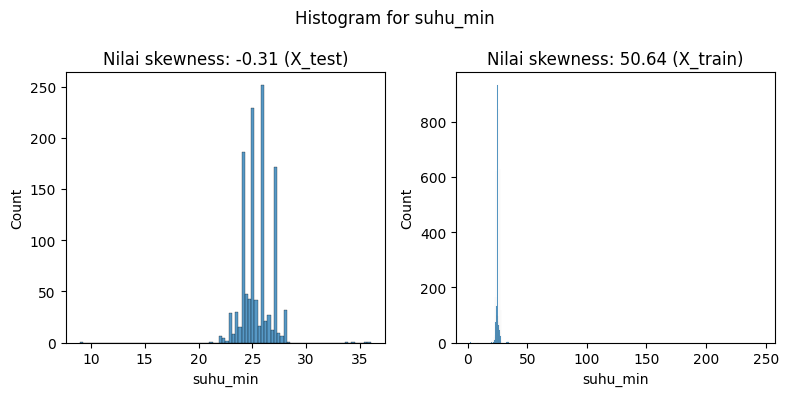

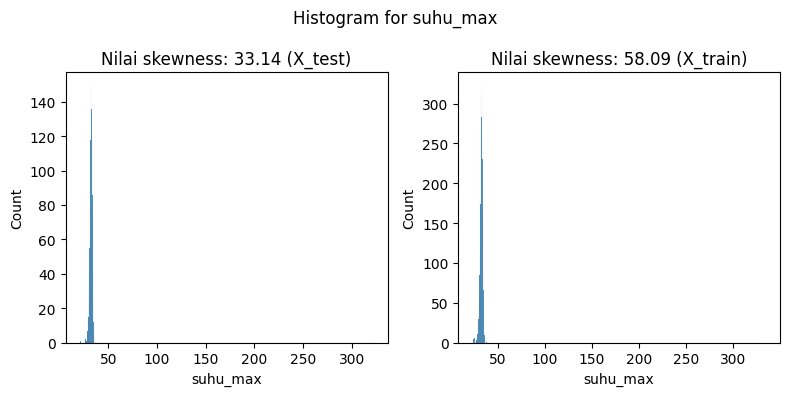

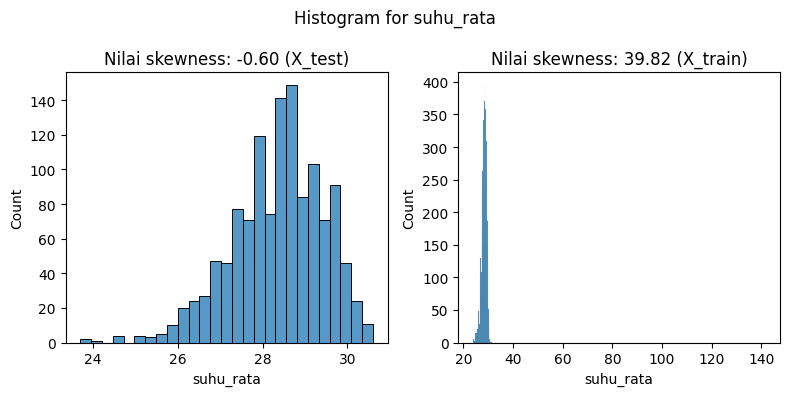

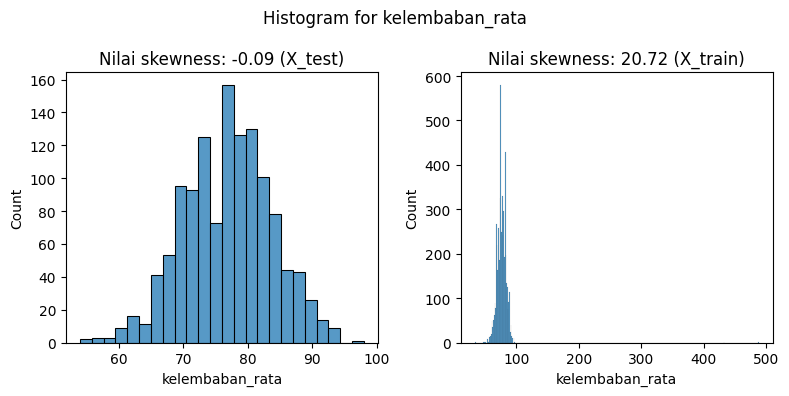

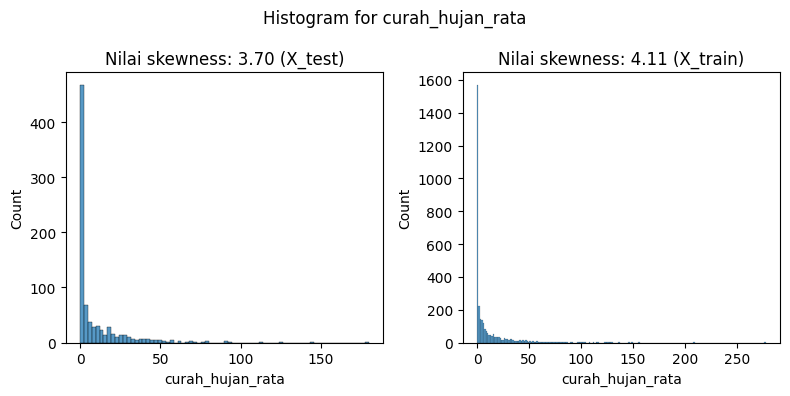

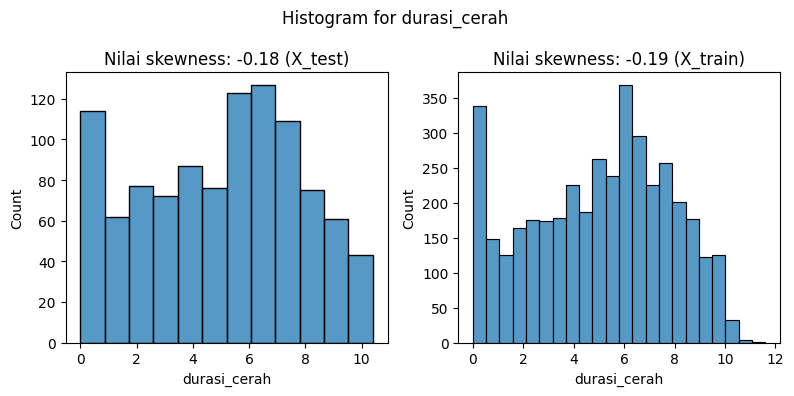

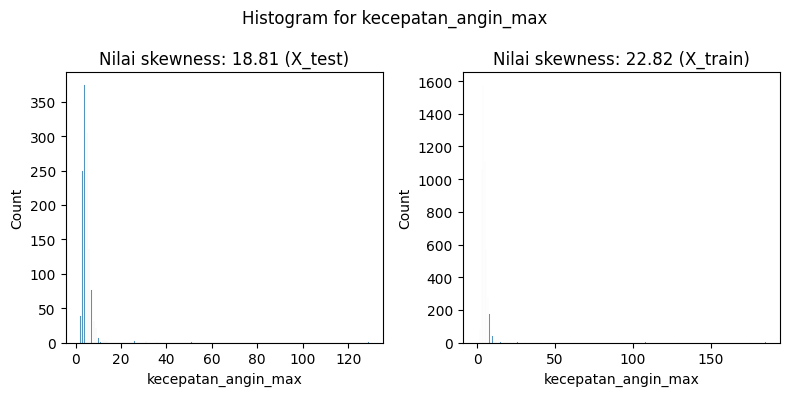

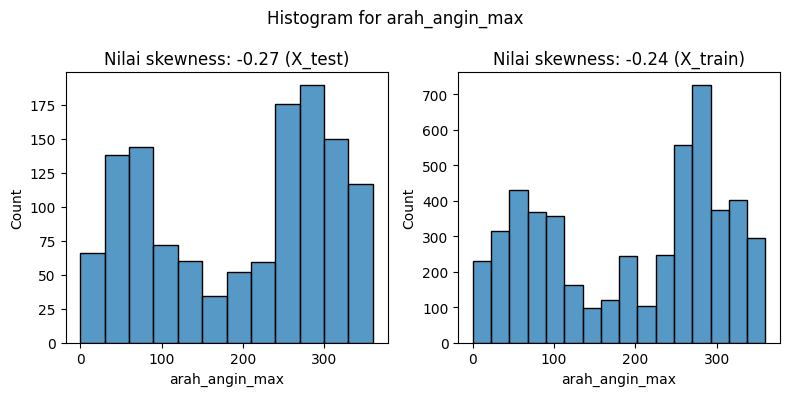

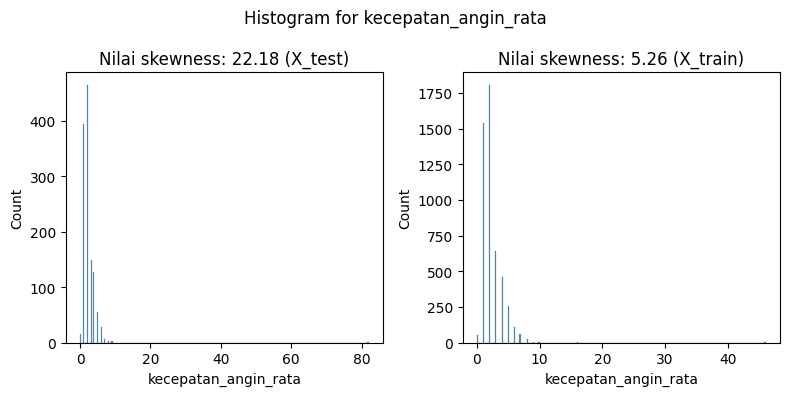

In [19]:
for i in kolom:
    # X Test
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(X_test[i])
    plt.title(f'Histogram for {i} X_test')

    skewness_X_test = X_test[i].skew()
    plt.title(f'Nilai skewness: {skewness_X_test:.2f} (X_test)')

    # X Train
    plt.subplot(1, 2, 2)
    sns.histplot(X_train[i])
    plt.title(f'Histogram for {i} tidak banjir')
    
    skewness_X_train = X_train[i].skew()
    plt.title(f'Nilai skewness: {skewness_X_train:.2f} (X_train)')

    plt.suptitle(f'Histogram for {i}')
    plt.tight_layout()
    plt.show()

#### Mengisi data
> Jila nilai skewnessnya normal (nilai antara -0.5 sampai 0.5) digunakan Mean Imputation
> Jila nilai skewnessnya jelek (nilai lebih kecil dari -0.5 atau lebih besar dari 0.5) digunakan Median Imputation

In [20]:
for i in kolom:
    skewness_X_test = X_test[i].skew()
    if skewness_X_test < -0.5 or skewness_X_test > -0.5:
        X_test[i].fillna(df[i].median(), inplace=True)
    if skewness_X_test > -0.5 or skewness_X_test < -0.5:
        X_test[i].fillna(df[i].mean(), inplace=True)

    skewness_X_train = X_train[i].skew()
    if skewness_X_train < -0.5 or skewness_X_train > -0.5:
        X_train[i].fillna(df[i].median(), inplace=True)
    skewness_X_train = X_train[i].skew()
    if skewness_X_train > -0.5 or skewness_X_train < -0.5:
        X_train[i].fillna(df[i].mean(), inplace=True)    

## Handle Outlier

### Melihat distribusi tiap kategori

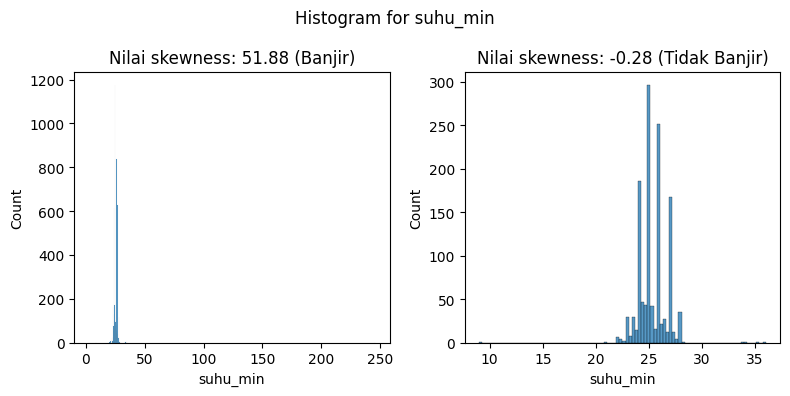

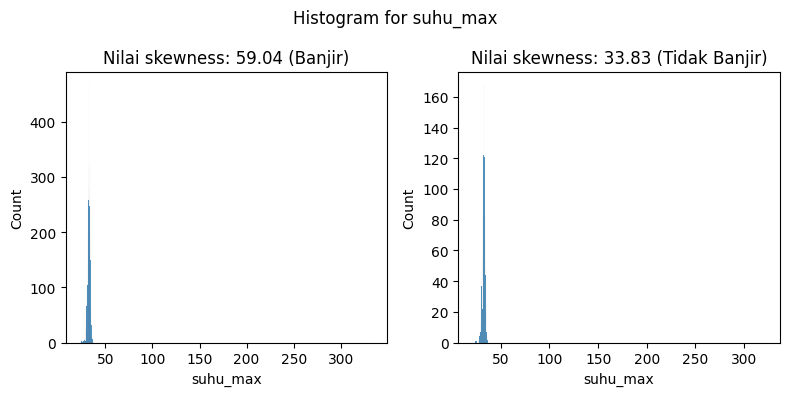

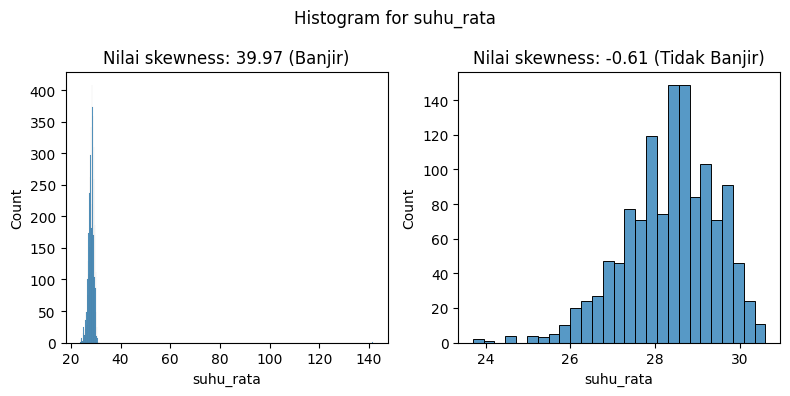

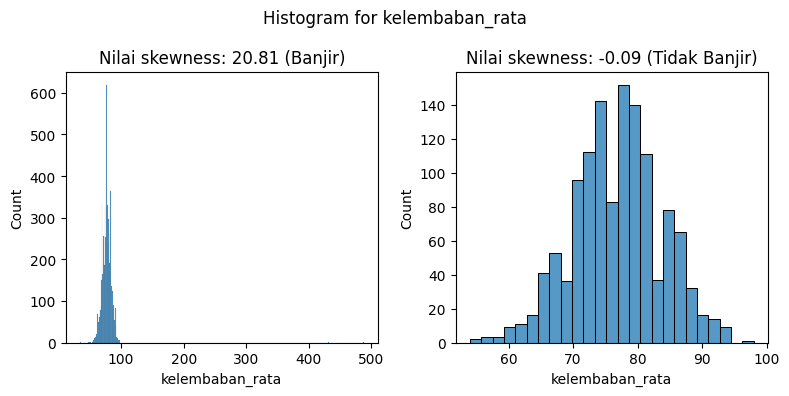

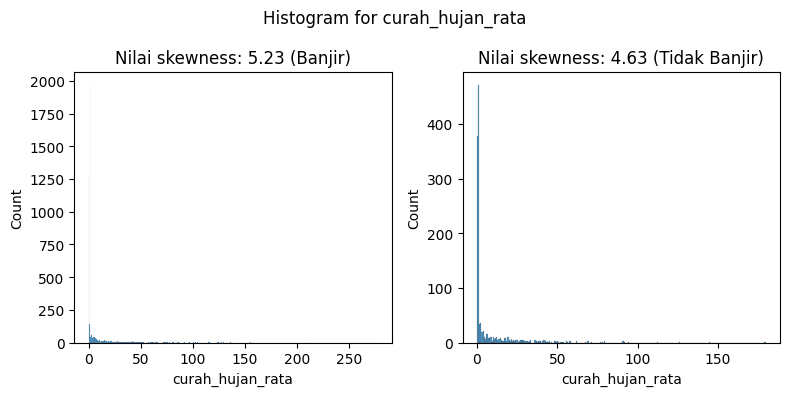

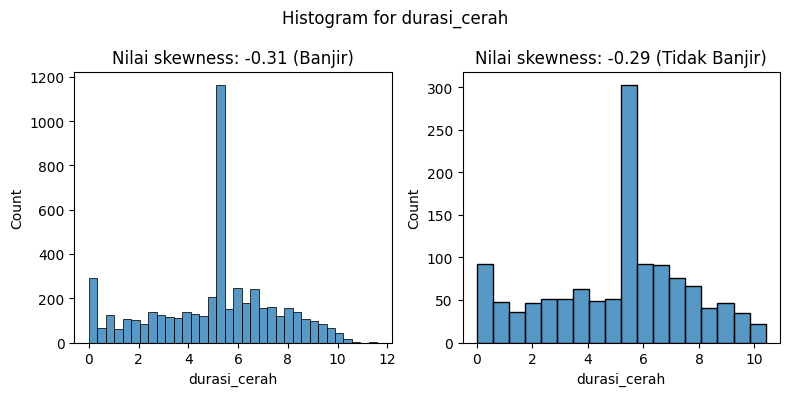

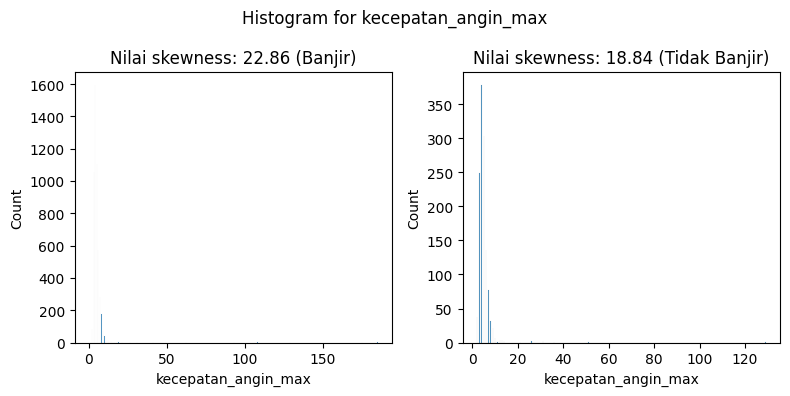

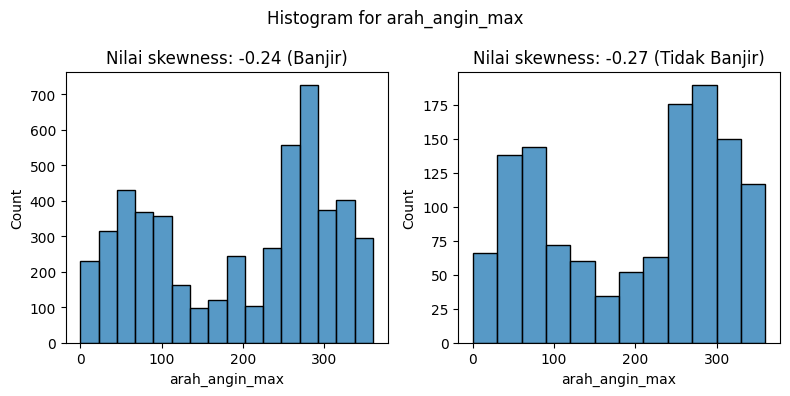

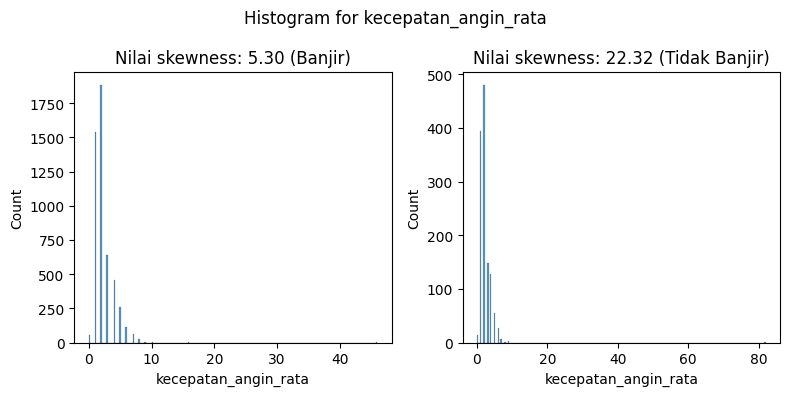

In [21]:
for i in kolom:
    # Data Banjir
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[i])
    plt.title(f'Histogram for {i} X_train')

    skewness__X_train = X_train[i].skew()
    plt.title(f'Nilai skewness: {skewness__X_train:.2f} (Banjir)')

    # Data Tidak Banjir
    plt.subplot(1, 2, 2)
    sns.histplot(X_test[i])
    plt.title(f'Histogram for {i} X_test')
    
    skewness_X_test = X_test[i].skew()
    plt.title(f'Nilai skewness: {skewness_X_test:.2f} (Tidak Banjir)')

    plt.suptitle(f'Histogram for {i}')
    plt.tight_layout()
    plt.show()

### Pada data X train

In [22]:
kolom_outlier = ['suhu_min', 'suhu_max', 'suhu_rata', 'kelembaban_rata', 'curah_hujan_rata']

def batas_x_train(X_train, kolom_outlier, jarak):
    batas_bawah = {}
    batas_atas = {}
    
    for col in kolom_outlier:
        IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
        batas_bawah[col] = X_train[col].quantile(0.25) - (IQR * jarak)
        batas_atas[col] = X_train[col].quantile(0.75) + (IQR * jarak)
    
    return batas_bawah, batas_atas

batas_bawah, batas_atas = batas_x_train(X_train, kolom, 1.5)

X_train_trimmed = X_train.copy()
for col in kolom:
    X_train_trimmed = X_train_trimmed[(X_train_trimmed[col] >= batas_bawah[col]) & (X_train_trimmed[col] <= batas_atas[col])]


print('Sebelum trim : ', X_train.shape)
print('Sesudah trim  : ', X_train_trimmed.shape)

Sebelum trim :  (5046, 10)
Sesudah trim  :  (3422, 10)


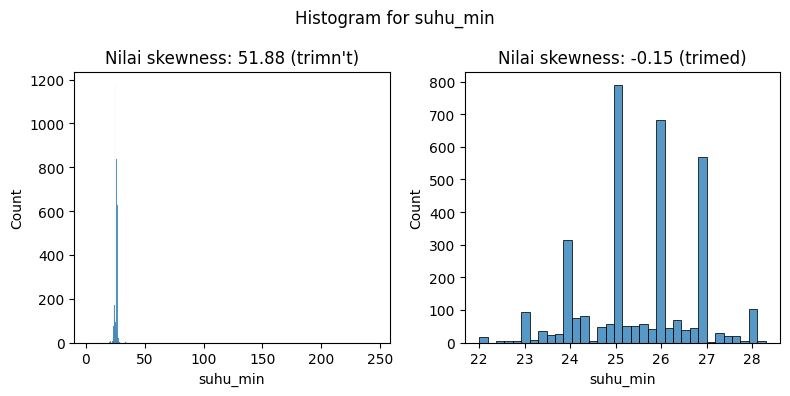

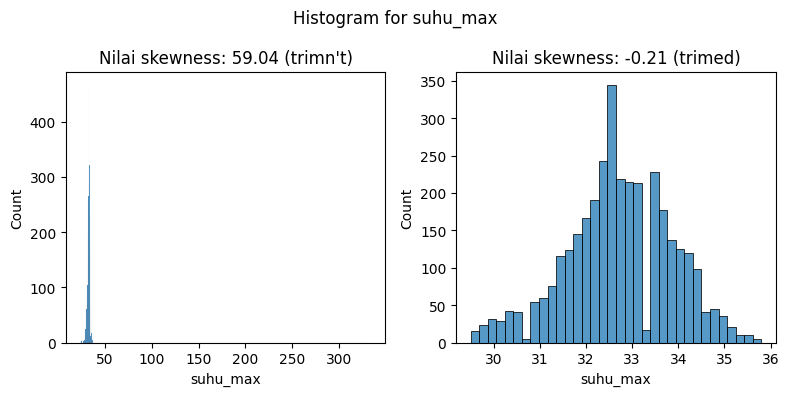

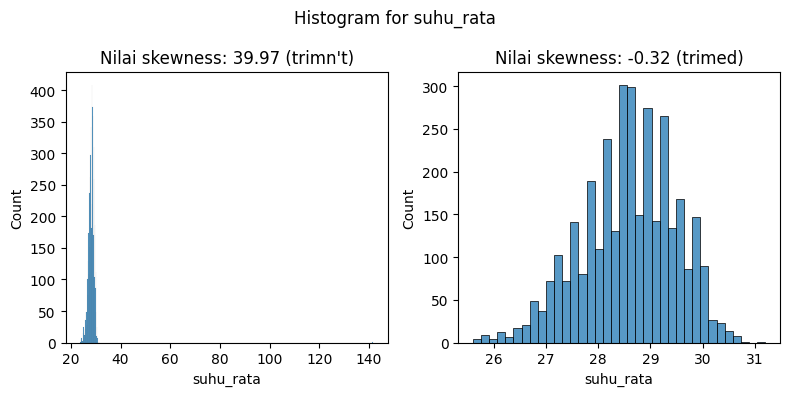

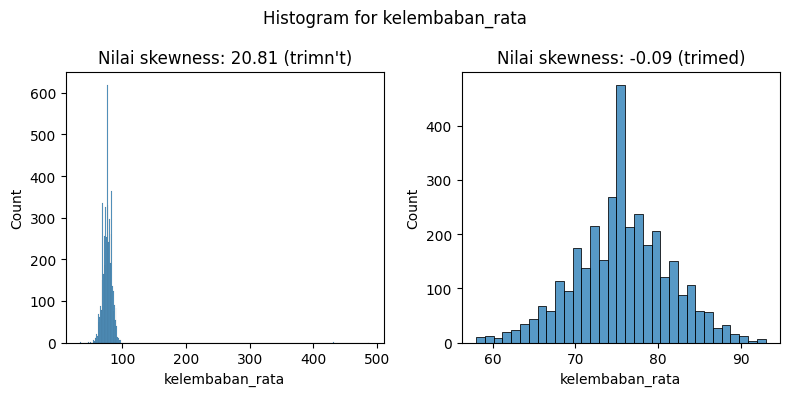

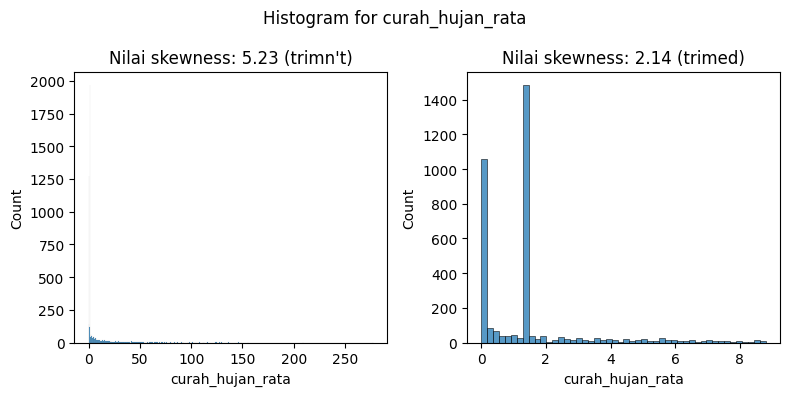

In [23]:
for i in kolom_outlier:
    # Data sebelum trimming
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[i])
    plt.title(f'Histogram for {i} X_train')

    skewness_X_train = X_train[i].skew()
    plt.title(f'Nilai skewness: {skewness_X_train:.2f} (trimn\'t)')

    # Data setelah trimming
    plt.subplot(1, 2, 2)
    sns.histplot(X_train_trimmed[i])
    plt.title(f'Histogram for {i} X_test')
    
    skewness_X_train_trim = X_train_trimmed[i].skew()
    plt.title(f'Nilai skewness: {skewness_X_train_trim:.2f} (trimed)')

    plt.suptitle(f'Histogram for {i}')
    plt.tight_layout()
    plt.show()

### Pada data X test

In [24]:
def batas_x_test(X_test, kolom_outlier, jarak):
    batas_bawah = {}
    batas_atas = {}
    
    for col in kolom_outlier:
        IQR = X_test[col].quantile(0.75) - X_test[col].quantile(0.25)
        batas_bawah[col] = X_test[col].quantile(0.25) - (IQR * jarak)
        batas_atas[col] = X_test[col].quantile(0.75) + (IQR * jarak)
    
    return batas_bawah, batas_atas

batas_bawah, batas_atas = batas_x_test(X_test, kolom, 1.5)

X_test_trimmed = X_test.copy()
for col in kolom:
    X_test_trimmed = X_test_trimmed[(X_test_trimmed[col] >= batas_bawah[col]) & (X_test_trimmed[col] <= batas_atas[col])]


print('Sebelum trim : ', X_test.shape)
print('Sesudah trim  : ', X_test_trimmed.shape)

Sebelum trim :  (1262, 10)
Sesudah trim  :  (838, 10)


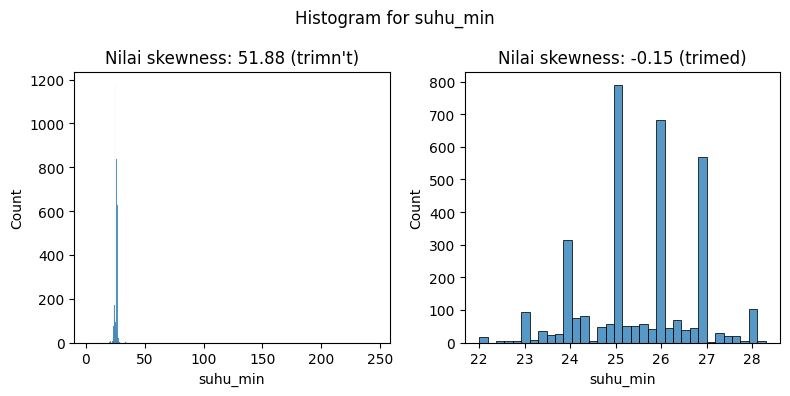

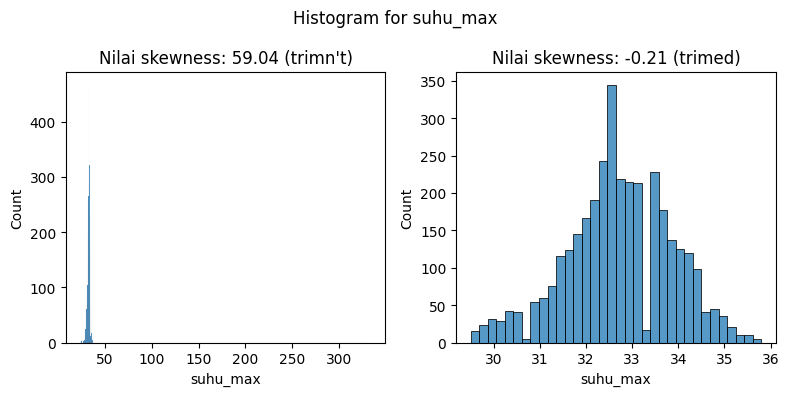

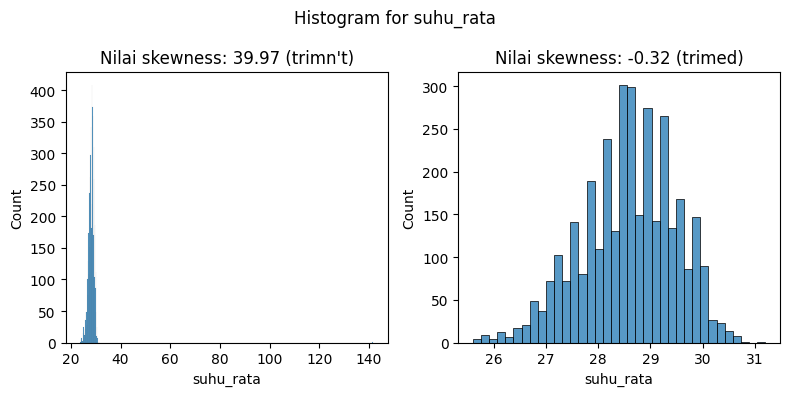

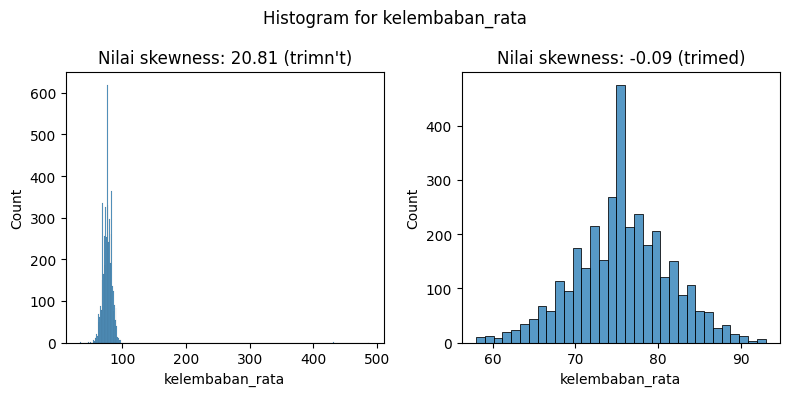

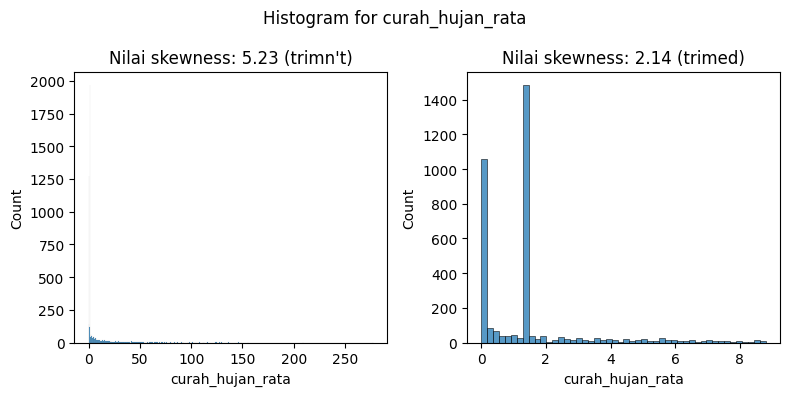

In [25]:
for i in kolom_outlier:
    # Data sebelum trimming
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[i])
    plt.title(f'Histogram for {i} X_train')

    skewness_X_train = X_train[i].skew()
    plt.title(f'Nilai skewness: {skewness_X_train:.2f} (trimn\'t)')

    # Data setelah trimming
    plt.subplot(1, 2, 2)
    sns.histplot(X_train_trimmed[i])
    plt.title(f'Histogram for {i} X_test')
    
    skewness_X_train_trim = X_train_trimmed[i].skew()
    plt.title(f'Nilai skewness: {skewness_X_train_trim:.2f} (trimed)')

    plt.suptitle(f'Histogram for {i}')
    plt.tight_layout()
    plt.show()

## Feature Selection

In [26]:
# Menghilangkan data di y_train yang hilang saat outlier pada X_train
y_train = y_train.filter(items=X_train_trimmed.index,axis=0)

In [27]:
# Membagi kolom berdasarkan tipe
numeric_features = X_train_trimmed.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train_trimmed.select_dtypes(exclude=np.number).columns.tolist()

print ('Kolom numeric : ', numeric_features)
print ('Kolom kategori : ', categorical_features)

Kolom numeric :  ['suhu_min', 'suhu_max', 'suhu_rata', 'kelembaban_rata', 'curah_hujan_rata', 'durasi_cerah', 'kecepatan_angin_max', 'arah_angin_max', 'kecepatan_angin_rata']
Kolom kategori :  ['nama_daerah']


In [28]:
# Membuat pipeline
numeric_transformer = Pipeline(steps=[("scaler", MinMaxScaler())])
categorical_transformer = Pipeline(steps=[("encoder", OrdinalEncoder())])

preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])

pipe = Pipeline(steps=[("preprocessor", preprocessor)])
pipe.fit(X_train_trimmed, y_train)
X_train_encoded = pipe.transform(X_train_trimmed)

X_test_encoded = pipe.transform(X_test)

In [29]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['suhu_min', 'suhu_max',
                                                   'suhu_rata',
                                                   'kelembaban_rata',
                                                   'curah_hujan_rata',
                                                   'durasi_cerah',
                                                   'kecepatan_angin_max',
                                                   'arah_angin_max',
                                                   'kecepatan_angin_rata']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['nama_daerah'])]))])

> Menggunakan MinMaxScaler karena datanya tidak terdistribusi dengan baik

> Menggunakan OrdinalEncoder karena mengubah data text menjadi angka ordinal, data yang diubah juga bukan merupakan nominal


In [30]:
X_train_df = pd.DataFrame(X_train_encoded, columns=[numeric_features + categorical_features])
X_train_df

,suhu_min,suhu_max,suhu_rata,kelembaban_rata,curah_hujan_rata,durasi_cerah,kecepatan_angin_max,arah_angin_max,kecepatan_angin_rata,nama_daerah
0,0.634921,0.555556,0.535714,0.485714,0.000000,0.694444,0.333333,0.972222,0.166667,0.0
1,0.317460,0.428571,0.410714,0.628571,0.988636,0.509259,0.000000,0.055556,0.166667,0.0
2,0.634921,0.126984,0.303571,0.600000,0.170455,0.500000,0.333333,0.750000,0.166667,3.0
3,0.539683,0.761905,0.589286,0.514286,0.215909,0.398148,0.333333,0.583333,0.333333,1.0
4,0.476190,0.904762,0.732143,0.314286,0.056818,0.694444,0.666667,0.111111,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
3417,0.571429,0.619048,0.857143,0.514286,0.159091,0.462963,0.333333,0.194444,0.166667,0.0
3418,0.317460,0.396825,0.250000,0.857143,0.465909,0.481481,0.000000,0.694444,0.166667,1.0
3419,0.158730,0.492063,0.357143,0.571429,0.159091,0.277778,0.000000,0.527778,0.666667,1.0
3420,0.634921,0.492063,0.500000,0.571429,0.159091,0.592593,0.333333,0.027778,0.333333,3.0


Mengimbangkan data

In [31]:
# Pada Data Train
X_train_resampled, y_train_resampled = SMOTE(sampling_strategy='minority').fit_resample(X_train_df, y_train) 
y_train_resampled.value_counts()

banjir
0    3253
1    3253
Name: count, dtype: int64

In [32]:
# Pada Data Test
smotenc = SMOTENC(categorical_features=[9], random_state=1509)
X_test_resampled, y_test_resampled = smotenc.fit_resample(X_test_encoded, y_test) 
print(y_test_resampled.value_counts())

banjir
0    1172
1    1172
Name: count, dtype: int64


## EDA setelah Feature Engineering

In [33]:
# Menggabungkan data numeric dan categorical
data_trim = pd.concat([pd.DataFrame(X_train_df),
                      pd.DataFrame(y_train)],
                      axis=1)

In [34]:
# Define new column names
new_column_names = numeric_features + categorical_features + ['banjir']

# Rename the columns in data_trim
data_trim.columns = new_column_names


In [35]:
data_trim

,suhu_min,suhu_max,suhu_rata,kelembaban_rata,curah_hujan_rata,durasi_cerah,kecepatan_angin_max,arah_angin_max,kecepatan_angin_rata,nama_daerah,banjir
0,0.634921,0.555556,0.535714,0.485714,0.000000,0.694444,0.333333,0.972222,0.166667,0.0,NaN
1,0.317460,0.428571,0.410714,0.628571,0.988636,0.509259,0.000000,0.055556,0.166667,0.0,1.0
2,0.634921,0.126984,0.303571,0.600000,0.170455,0.500000,0.333333,0.750000,0.166667,3.0,NaN
3,0.539683,0.761905,0.589286,0.514286,0.215909,0.398148,0.333333,0.583333,0.333333,1.0,0.0
4,0.476190,0.904762,0.732143,0.314286,0.056818,0.694444,0.666667,0.111111,1.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [36]:
# Mengeksport dataframe ke CSV
data_trim.to_csv(r'/jakarta_flood_trim.csv', index=False)

In [37]:
kolom = ['suhu_min', 'suhu_max', 'suhu_rata', 'kelembaban_rata', 'curah_hujan_rata', 'durasi_cerah', 
         'kecepatan_angin_max', 'arah_angin_max','kecepatan_angin_rata', 'nama_daerah']

data_banjir         = data_trim[data_trim['banjir'] == 1][kolom]
data_tidak_banjir   = data_trim[data_trim['banjir'] == 0][kolom]

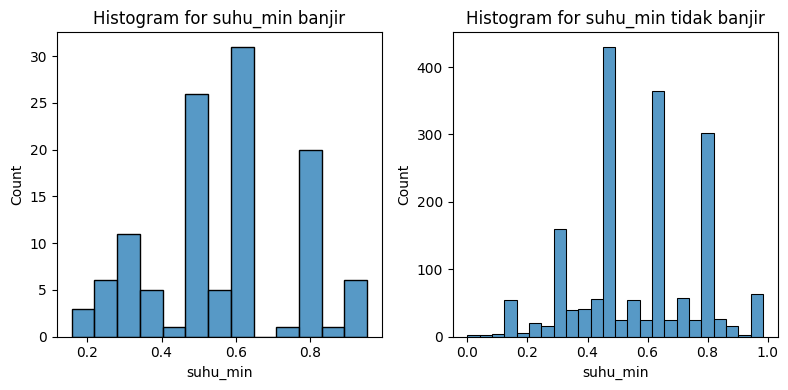

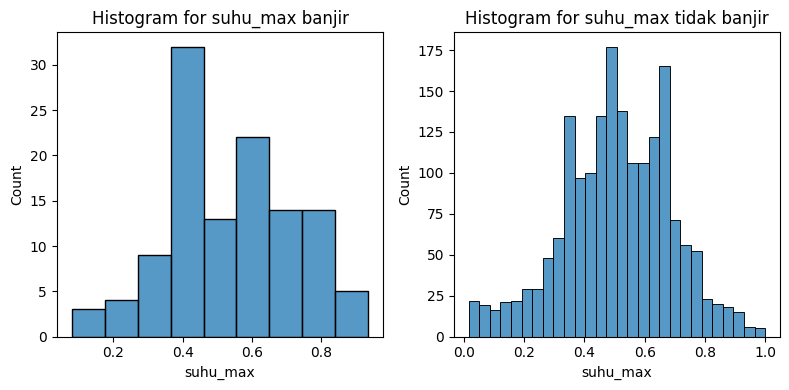

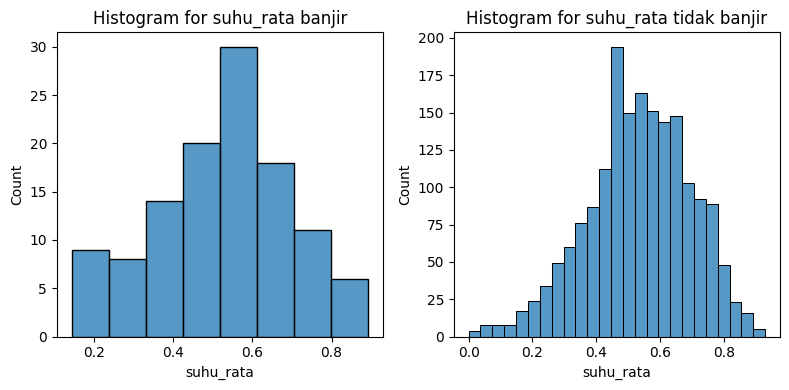

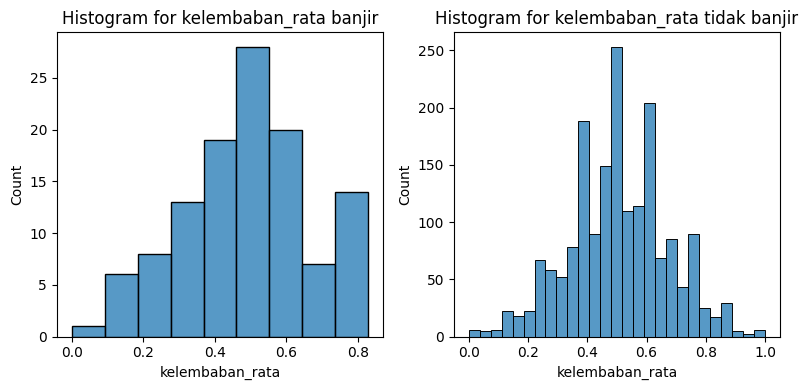

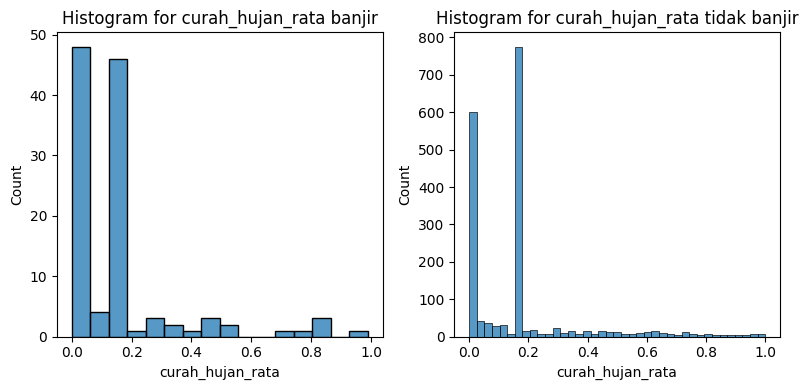

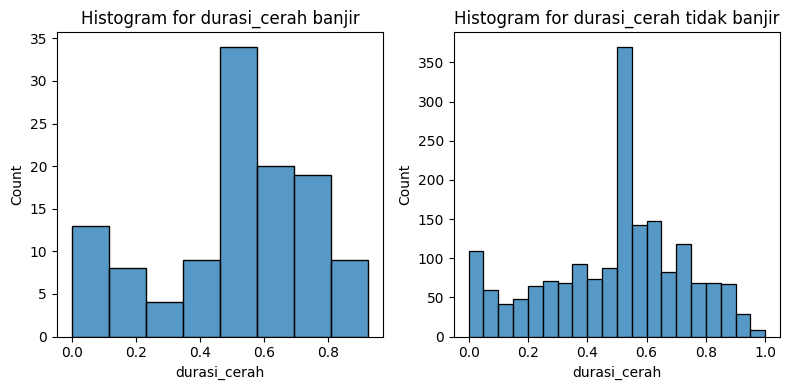

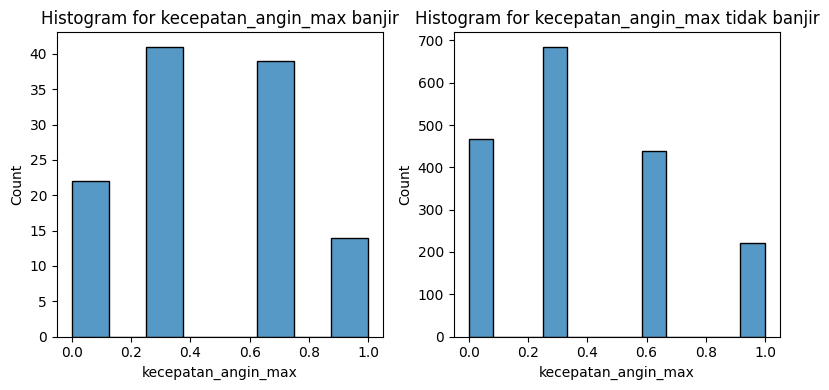

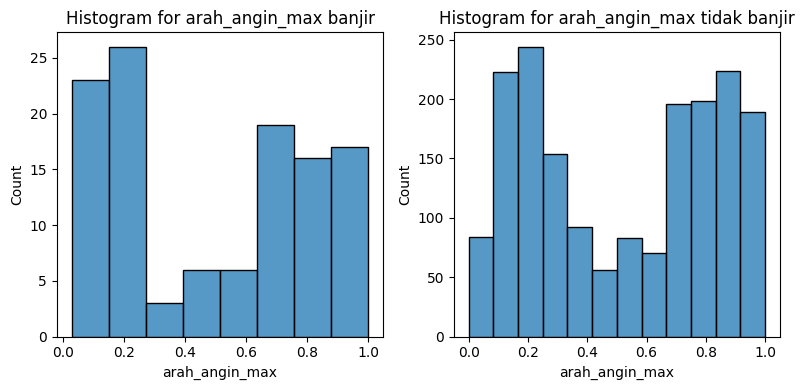

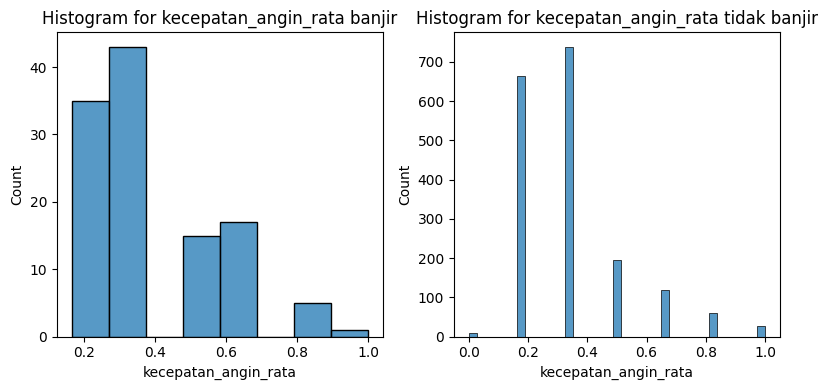

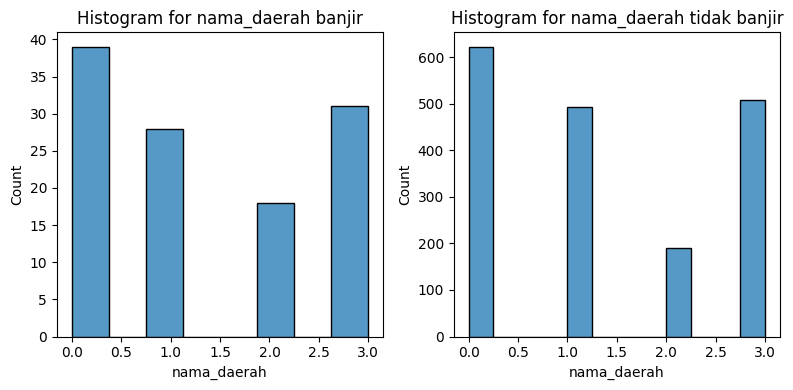

In [38]:
for i in kolom:
    # X Test
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(data_banjir[i])
    plt.title(f'Histogram for {i} banjir')

    # X Train
    plt.subplot(1, 2, 2)
    sns.histplot(data_tidak_banjir[i])
    plt.title(f'Histogram for {i} tidak banjir')

    plt.tight_layout()
    plt.show()

### Perbandingan Suhu Min dan Suhu Max

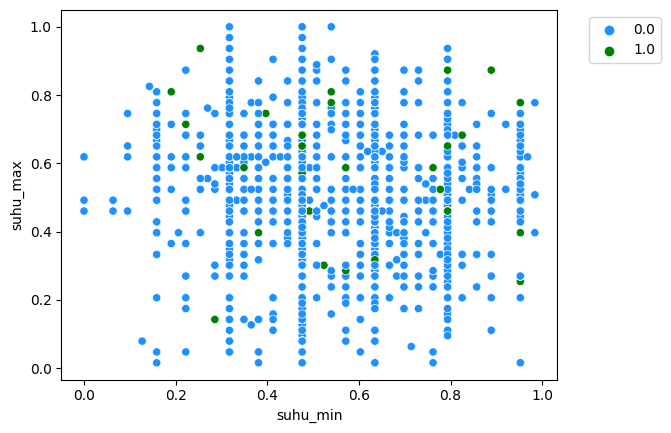

In [39]:
sns.scatterplot (data=data_trim, x='suhu_min', y='suhu_max', hue='banjir', palette=dict({1.0:'green', 0.0:'dodgerblue'}))
plt.legend (bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Angka 0 artinya tidak banjir, dan angka 1 banjir, dari grafik diatas tidak ada suhu yang pasti untuk menyebabkan banjir atau tidaknya

### Perbandingan Kelembaban dan Curah Hujan

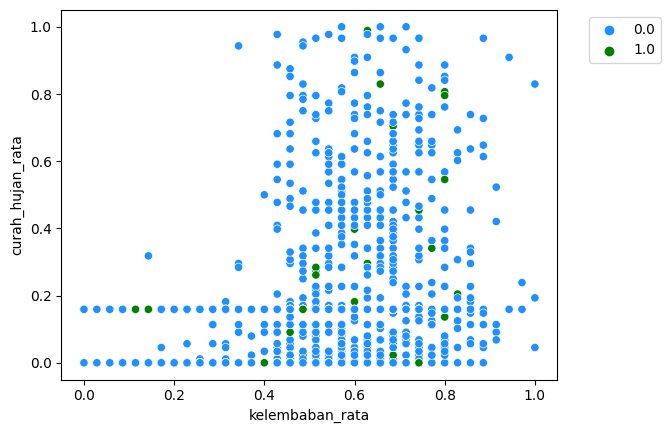

In [40]:
sns.scatterplot (data=data_trim, x='kelembaban_rata', y='curah_hujan_rata', hue='banjir', palette=dict({1.0:'green', 0.0:'dodgerblue'}))
plt.legend (bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Angka 0 artinya tidak banjir, dan angka 1 banjir, dari grafik diatas tidak ada hubungan yang relevan pada banjir atau tidaknya

### Perbandingan Suhu Rata-Rata dan Kecepatan Angin Rata-rata

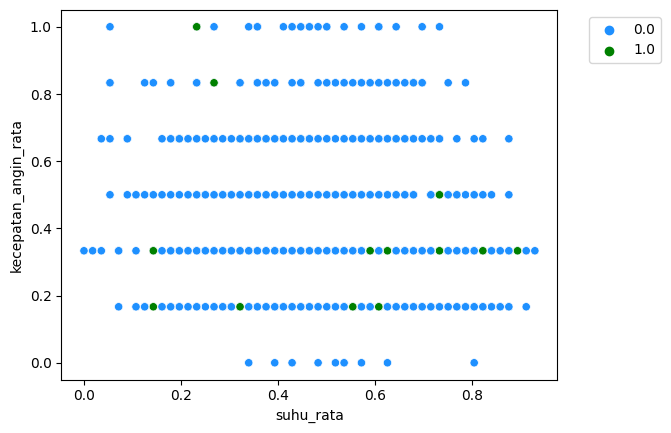

In [41]:
sns.scatterplot (data=data_trim, x='suhu_rata', y='kecepatan_angin_rata', hue='banjir', palette=dict({1.0:'green', 0.0:'dodgerblue'}))
plt.legend (bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Angka 0 artinya tidak banjir, dan angka 1 banjir, dari grafik diatas tidak ada hubungan yang relevan pada banjir atau tidaknya

### Perbandingan Curah Hujan dengan Arah Angin

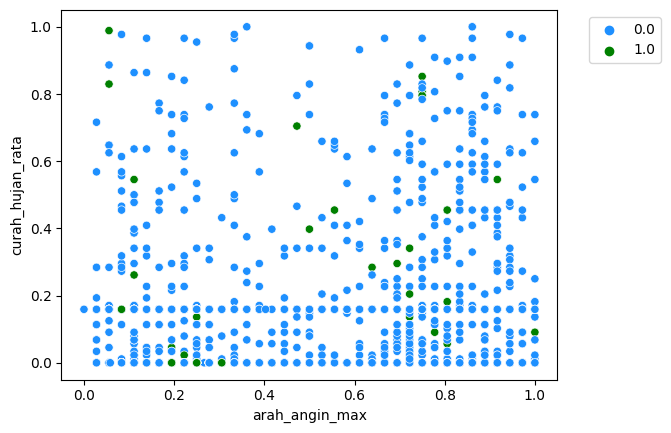

In [42]:
sns.scatterplot (data=data_trim, y='curah_hujan_rata', x='arah_angin_max', hue='banjir', palette=dict({1.0:'green', 0.0:'dodgerblue'}))
plt.legend (bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Angka 0 artinya tidak banjir, dan angka 1 banjir, dari grafik diatas tidak ada hubungan yang relevan pada banjir atau tidaknya

# v - Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## Logistic Regression

In [43]:
# Mendefinisikan model Logistic Regression
model_log_reg = LogisticRegression(random_state=1509)

## K-Nearest Neighbor

In [44]:
# Mendefinisikan model K-Nearest Neighbor
model_knn = KNeighborsClassifier()

## Naive Bayes

In [45]:
# Mendefinisikan model Naive Bayes
model_nb = GaussianNB()

## SVM

In [46]:
# Mendefinisikan model SVM dengan SVC
model_svc = SVC (random_state=1509)

## Decision Tree

In [47]:
# Mendefinisikan model Decision Tree
model_dtc = DecisionTreeClassifier(random_state=1509)

## Random Forest

In [48]:
# Mendefinisikan model Random Forest
model_rfc = RandomForestClassifier(random_state=1509)

## Algoritma Boosting
> AdaBoost

In [49]:
model_abc = AdaBoostClassifier(random_state=1509)

# vi - Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## Logistik Regression

In [50]:
model_log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=1509)

## K-Nearest Neighbor

In [51]:
model_knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

## Naive Bayes

In [52]:
model_nb.fit(X_train_resampled, y_train_resampled)

GaussianNB()

## SVM

In [53]:
model_svc.fit(X_train_resampled, y_train_resampled)

SVC(random_state=1509)

## Decision Tree

In [54]:
model_dtc.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=1509)

## Random Forest

In [55]:
model_rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=1509)

## Algoritma Boosting

In [56]:
model_abc.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier(random_state=1509)

# vii - Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.**



## Cross Validation

### Logistic Regression

In [57]:
score_train_cross_val_log_reg = cross_val_score (model_log_reg,
                                                X_train_resampled,
                                                y_train_resampled,
                                                cv=5)

print('Score - Mean - Cross Validation : ', score_train_cross_val_log_reg.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_log_reg.std())

Score - Mean - Cross Validation :  0.806641352333252
Score - Std - Cross Validation  :  0.01032742116439398


### K Nearest Neighbor

In [58]:
score_train_cross_val_knn = cross_val_score (model_knn,
                                            X_train_resampled,
                                            y_train_resampled,
                                            cv=5)

print('Score - Mean - Cross Validation : ', score_train_cross_val_knn.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_knn.std())

Score - Mean - Cross Validation :  0.9102374281392903
Score - Std - Cross Validation  :  0.007289002506446903


### Naive Bayes

In [59]:
score_train_cross_val_nb = cross_val_score (model_nb,
                                            X_train_resampled,
                                            y_train_resampled,
                                            cv=5)

print('Score - Mean - Cross Validation : ', score_train_cross_val_nb.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_nb.std())


Score - Mean - Cross Validation :  0.781893521585074
Score - Std - Cross Validation  :  0.005382513814665275


### SVM

In [60]:
score_train_cross_val_svc = cross_val_score (model_svc,
                                            X_train_resampled,
                                            y_train_resampled,
                                            cv=5)

print('Score - Mean - Cross Validation : ', score_train_cross_val_svc.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_svc.std())


Score - Mean - Cross Validation :  0.8307739172632184
Score - Std - Cross Validation  :  0.009297219241289973


### Decision Tree

In [61]:
score_train_cross_val_dtc = cross_val_score (model_dtc,
                                            X_train_resampled,
                                            y_train_resampled,
                                            cv=3)

print('Score - Mean - Cross Validation : ', score_train_cross_val_dtc.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_dtc.std())


Score - Mean - Cross Validation :  0.9223812051398523
Score - Std - Cross Validation  :  0.020852861796915447


### Random Forest

In [62]:
score_train_cross_val_rfc = cross_val_score (model_rfc,
                                            X_train_resampled,
                                            y_train_resampled,
                                            cv=3)

print('Score - Mean - Cross Validation : ', score_train_cross_val_rfc.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_rfc.std())

Score - Mean - Cross Validation :  0.9635729362134562
Score - Std - Cross Validation  :  0.004185581681081235


## Algoritma Boosting

In [63]:
score_train_cross_val_abc = cross_val_score (model_abc,
                                            X_train_resampled,
                                            y_train_resampled,
                                            cv=3)

print('Score - Mean - Cross Validation : ', score_train_cross_val_abc.mean())
print('Score - Std - Cross Validation  : ', score_train_cross_val_abc.std())


Score - Mean - Cross Validation :  0.8810339503809975
Score - Std - Cross Validation  :  0.010761966999239429


### Algoritma Terbaik

In [64]:
algoritma_terbaik = pd.DataFrame({
                    'Mean (%)': 
                    [
                    score_train_cross_val_log_reg.mean() * 100, 
                    score_train_cross_val_knn.mean() * 100, 
                    score_train_cross_val_nb.mean() * 100,
                    score_train_cross_val_svc.mean() * 100,
                    score_train_cross_val_dtc.mean() * 100,
                    score_train_cross_val_rfc.mean() * 100,
                    score_train_cross_val_abc.mean() * 100],
                    'Std (%)': 
                    [
                    score_train_cross_val_log_reg.std() * 100, 
                    score_train_cross_val_knn.std() * 100, 
                    score_train_cross_val_nb.std() * 100,
                    score_train_cross_val_svc.std() * 100,
                    score_train_cross_val_dtc.std() * 100,
                    score_train_cross_val_rfc.std() * 100,
                    score_train_cross_val_abc.std() * 100]
                    }, 
                    index = ["Logistik Regression", "K-Nearest Neighbor", "Naive Bayes", "SVM", "Decision Tree", "Random Forest", "AdaBoost"])
algoritma_terbaik

,Mean (%),Std (%)
Logistik Regression,80.664135,1.032742
K-Nearest Neighbor,91.023743,0.728900
Naive Bayes,78.189352,0.538251
SVM,83.077392,0.929722
Decision Tree,92.238121,2.085286
Random Forest,96.357294,0.418558
AdaBoost,88.103395,1.076197


Berdasarkan nilai pada tabel perbandingan mean dan std pada setiap model, digunakan model Random Forest karena nilai Mean dan Stdnya bagus

## Hyperparameter Tuning

In [65]:
param_grid = { 
    'n_estimators': [100, 200, 500], 
    'criterion' : ['gini', 'entropy', 'log_loss'],   
    'max_features': ['sqrt', 'log2'],
}

# Mendefinisikan model Random Forest
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, param_grid)
grid_rfc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

### RFC

Confusion Matrix Data Train Random Forest Sebelum Hypertuning: 
 [[3253    0]
 [   0 3253]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3253
           1       1.00      1.00      1.00      3253

    accuracy                           1.00      6506
   macro avg       1.00      1.00      1.00      6506
weighted avg       1.00      1.00      1.00      6506

Confusion Matrix Data Test Random Forest Sebelum Hypertuning: 
 [[1128   44]
 [ 666  506]]
              precision    recall  f1-score   support

           0       0.63      0.96      0.76      1172
           1       0.92      0.43      0.59      1172

    accuracy                           0.70      2344
   macro avg       0.77      0.70      0.67      2344
weighted avg       0.77      0.70      0.67      2344



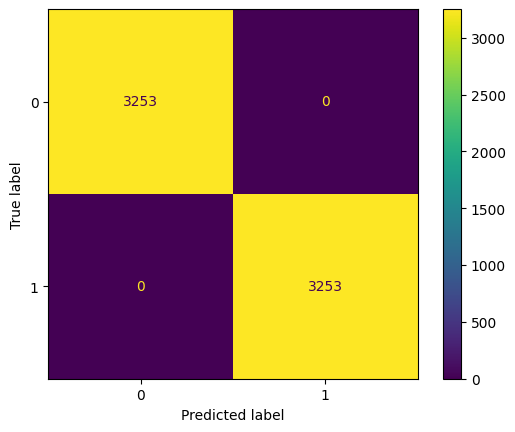

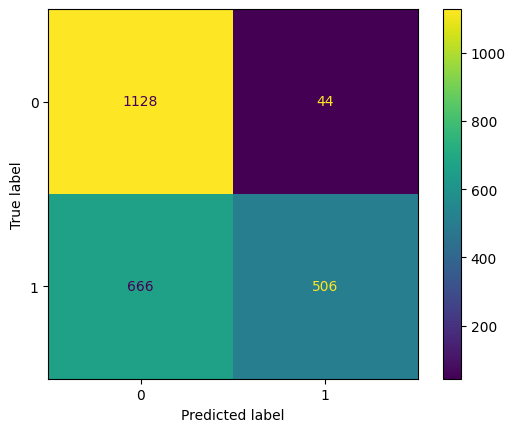

In [66]:
# Membuat prediksi Random Forest sebelum hypertuning
y_pred_rfc_train = model_rfc.predict(X_train_resampled)
y_pred_rfc_test = model_rfc.predict(X_test_resampled)

# Memperlihatkan confusion_matrix
cm_train_rfc = confusion_matrix(y_train_resampled, y_pred_rfc_train)
print('Confusion Matrix Data Train Random Forest Sebelum Hypertuning: \n', cm_train_rfc)
print(classification_report(y_train_resampled, y_pred_rfc_train))

cm_test_rfc = confusion_matrix(y_test_resampled, y_pred_rfc_test)
print('Confusion Matrix Data Test Random Forest Sebelum Hypertuning: \n', cm_test_rfc)
print(classification_report(y_test_resampled, y_pred_rfc_test))

ConfusionMatrixDisplay(cm_train_rfc).plot()
ConfusionMatrixDisplay(cm_test_rfc).plot()

Confusion Matrix Data Train Random Forest Setelah Hypertuning: 
 [[3253    0]
 [   0 3253]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3253
           1       1.00      1.00      1.00      3253

    accuracy                           1.00      6506
   macro avg       1.00      1.00      1.00      6506
weighted avg       1.00      1.00      1.00      6506

Confusion Matrix Data Test Random Forest Setelah Hypertuning: 
 [[1122   50]
 [ 536  636]]
              precision    recall  f1-score   support

           0       0.68      0.96      0.79      1172
           1       0.93      0.54      0.68      1172

    accuracy                           0.75      2344
   macro avg       0.80      0.75      0.74      2344
weighted avg       0.80      0.75      0.74      2344



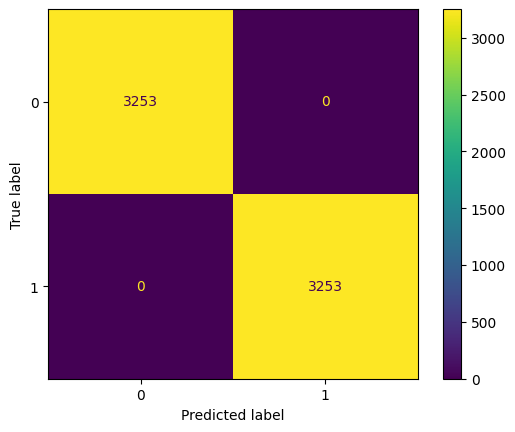

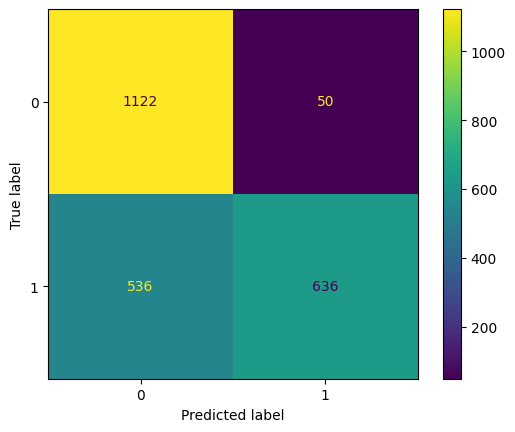

In [67]:
# Membuat prediksi Random Forest setelah hypertuning
best_model = grid_rfc.best_estimator_

y_pred_train = best_model.predict(X_train_resampled)
y_pred_test = best_model.predict(X_test_resampled)

# Memperlihatkan confusion_matrix
cm_train_rfc_ht = confusion_matrix(y_train_resampled, y_pred_train)
print('Confusion Matrix Data Train Random Forest Setelah Hypertuning: \n', cm_train_rfc_ht)
print(classification_report(y_train_resampled, y_pred_train))

cm_test_rfc_ht = confusion_matrix(y_test_resampled, y_pred_test)
print('Confusion Matrix Data Test Random Forest Setelah Hypertuning: \n', cm_test_rfc_ht)
print(classification_report(y_test_resampled, y_pred_test))

ConfusionMatrixDisplay(cm_train_rfc_ht).plot()
ConfusionMatrixDisplay(cm_test_rfc_ht).plot()

# viii - Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. **Dengan melihat hasil Model Evaluation, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.**

In [68]:
# Save the Files

joblib.dump(best_model, "best_model.pkl")
joblib.dump(pipe, 'pipeline.joblib')

['pipeline.joblib']

# ix - Model Inference
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. **Dengan melihat hasil Model Evaluation, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan Model Inference dan Model Deployment.**

In [69]:
load_model = joblib.load("best_model.pkl")
pipe = joblib.load('pipeline.joblib')

In [70]:
new_data = pd.DataFrame({
    'suhu_min': [25.6], 
    'suhu_max': [33.2], 
    'suhu_rata': [27.0], 
    'kelembaban_rata': [88.0],
    'curah_hujan_rata': [1.6], 
    'durasi_cerah': [8.7], 
    'kecepatan_angin_max': [4.0],
    'arah_angin_max': [290.0], 
    'kecepatan_angin_rata': [2],
    'nama_daerah' : ['Jakarta Selatan']
})
new_data

,suhu_min,suhu_max,suhu_rata,kelembaban_rata,curah_hujan_rata,durasi_cerah,kecepatan_angin_max,arah_angin_max,kecepatan_angin_rata,nama_daerah
0,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2,Jakarta Selatan


In [71]:
new_data_encoded = pipe.transform(new_data)
new_data_pred= load_model.predict(new_data_encoded)

print("Hasil prediksi dari pemodelan :", new_data_pred)

Hasil prediksi dari pemodelan : [1]


# x - Pengambilan Kesimpulan
> Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

Berdasarkan hasil pengerjaan, dapat disimpulkan bahwa:

1. Dari EDA, terlihat bahwa dataset ini didominasi oleh yang tidak banjir pada daerah Jakarta Utara, Jakarta Timur, Jakarta Selatan, dan Jakarta Pusat. Terlihat juga tidak adanya korelasi dari semua kolom yang menandakan banjir atau tidaknya tidak terlalu bergantung dengan keadaan di udara, dimanapun lokasinya.
    
2. Berdasarkan Model Evaluation, dari beberapa model yang ad yang paling bagus adalah model Random Forest, model baseline tersebut sudah bagus dalam menangani dataset, saat dilakukan hyperparameter tuning dengan beberapa parameter yang digunakan, tidak berubah. Dataset ini tergolong overfit karena gap antara data train dan data testnya tinggi. Model tersebut dapat memprediksi yang banjir dengan baik tetapi buruk dalam memprediksi yang tidak banjir.

    True Positive yang berarti tidak banjir dan tidak terdeteksi sebagai banjir memiliki nilai yang banyak, artinya pada dataset ini banyak yang tidak banjir, sedangkan pada False negative yang berarti banjir dan terdeteksi banjir. 


3. Untuk mengimprovenya dapat digunakan model-model lainnya ataupun hyperparameter yang lebih banyak